# Multi-class classification and Neural Networks

### Python Implementation

## Multiclass Classification

In [1]:
%matplotlib inline
import numpy as np #linear algebra
import matplotlib.pyplot as plt # visualization
from matplotlib import cm
from scipy import optimize # Octave's fmincg alternative
from scipy.io import loadmat

There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is 'unrolled' into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.

In [2]:
#load Data
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y'].ravel()

In [3]:
print(X.shape, y.shape)

(5000, 400) (5000,)


### Visualizing the data

The code below randomly selects selects 100 rows from X and passes those rows to the displayData function. This function maps each row to a 20 pixel by 20 pixel grayscale image and displays the images together

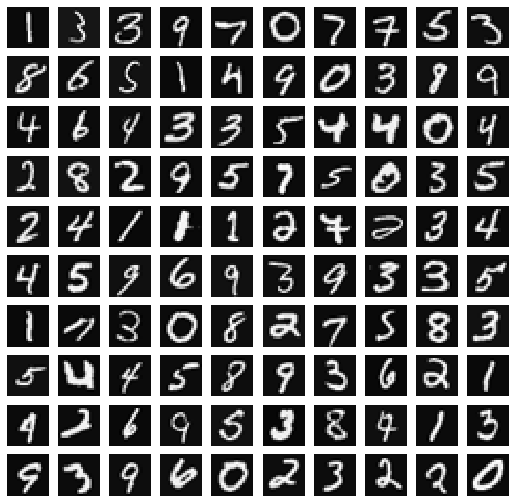

In [4]:
plt.figure(figsize=(9,9))
for i in range(100):
    plt.subplot(10,10,i+1) # 10 rows 10 columns index i+1
    plt.imshow(X[np.random.randint(0,5001)].reshape((20,20)).T, cmap =cm.gray, interpolation = 'nearest')
    plt.axis('off')
plt.show()

### Vectorizing logistic regression

#### Sigmoid Function

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
sigmoid(0)

0.5

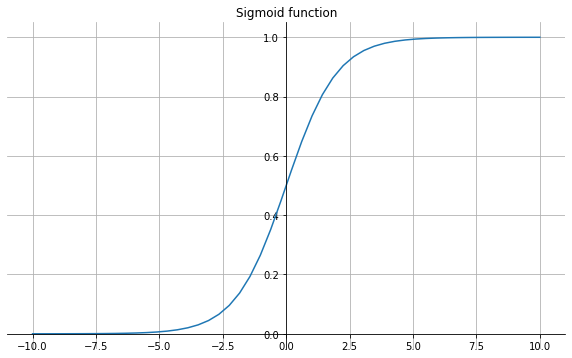

In [7]:
g = lambda z: sigmoid(z)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
z = np.linspace(-10,10)
plt.plot(z, g(z))
plt.title('Sigmoid function')
plt.grid()
plt.show()

###  Vectorizing the cost function

The goal is to use vectorized implementations of the cost and gradient functions

The cost function is defined by
\begin{align}
J(\theta) =\frac{1}{m}\sum_{i=1}^m{\left[
-y^{(i)} \log(h_{\theta}(x^{(i)}))- (1 -y^{(i)}) \log(1-h_{\theta}(x^{(i)}))\right]+\frac{\lambda}{2m}\sum_{j=1}^n{\theta_j^2}}
\end{align}

The gradient of the cost function is a vector where the $jth$ element is defined as follows
    
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m{\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}\qquad \mathrm{for}\;j=0,}$$

$$\frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m}\sum_{i=1}^m{\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}} \right)+\frac{\lambda}{m}\theta_j\qquad \mathrm{for}\;j\geq1,$$

In [8]:
def lrCostFunction(theta,X,y,lam):
    m= y.size
    h = sigmoid(X.dot(theta))
    J = (-1/m) * ((y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))) + ((lam/(2*m))* np.sum(theta[1:]**2))
    
    grad = (1/m) * X.T.dot(h-y)
    grad[1:] += (lam/m) * theta[1:]
    
    return J, grad

In [9]:
'''
 Test cases 
 J = 2.534819
 grads = 0.146561, -0.548558, 0.724722, 1.398003
'''
theta_t = np.array([-2, -1, 1, 2])
X_t = np.array([[1., 0.1, 0.6, 1.1],
                [1., 0.2, 0.7, 1.2],
                [1., 0.3, 0.8, 1.3],
                [1., 0.4, 0.9, 1.4],
                [1., 0.5, 1.0, 1.5]])
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)
print(J)
print(grad)

2.534819396109744
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


### One vs All Classification

We will use scipy minimize function qhich is an alternative to octaves fmincg's functon

In [10]:
# define seperate functions to calculate the cost and the gradient
def cost(theta, X, y, lam):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1/m)*(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (lam/ (2 * m)) * np.sum(theta[1:]**2) 
    return J


def gradient(theta, X, y, lam):
    m = y.size
    h = sigmoid(np.dot(X, theta))
    grad = (1/m) * X.T.dot(h-y)
    grad[1:] += ((lam/m)* theta[1:])
    return grad

In [11]:
def oneVsAll(X, y, num_labels, lam):
    X_train = np.insert(X,0,1, axis=1)
    n = X_train.shape[1]
    all_theta = np.zeros((num_labels, n))
    for i in range(num_labels+1):
        initial_theta = np.zeros(n)
        result = optimize.minimize(fun=cost, x0=initial_theta,
                                args=(X_train, (y==i).astype(int), lam),
                                method='CG', jac=gradient)
        all_theta[i - 1] = result.x
    return all_theta

In [12]:
num_labels = 10
lam = 0.1
all_theta = oneVsAll(X, y, num_labels, lam)
print(all_theta)

[[-3.07520672e+00  0.00000000e+00  0.00000000e+00 ...  6.27213273e-03
   6.33984668e-08  0.00000000e+00]
 [-3.73313298e+00  0.00000000e+00  0.00000000e+00 ...  2.01079039e-02
  -2.25739025e-03  0.00000000e+00]
 [-5.70783731e+00  0.00000000e+00  0.00000000e+00 ... -7.06085745e-05
  -2.97456866e-07  0.00000000e+00]
 ...
 [-9.13103600e+00  0.00000000e+00  0.00000000e+00 ... -5.13460620e-04
   5.59430291e-05  0.00000000e+00]
 [-5.61770404e+00  0.00000000e+00  0.00000000e+00 ... -1.07597274e-02
   8.21470804e-04  0.00000000e+00]
 [-8.08140728e+00  0.00000000e+00  0.00000000e+00 ... -5.79410875e-05
   2.34961675e-06  0.00000000e+00]]


In [13]:
all_theta.shape

(10, 401)

### One-Vs-All Prediction

In [14]:
def predictOneVsAll(all_theta, X):
    X_train = np.insert(X,0,1, axis=1)
    hypoth = X_train.dot(all_theta.T)
    predictions = np.argmax(hypoth, axis=1) +1
    return predictions

You should see that the accuracy is about 96.5%.

In [15]:
accuracy = np.mean(predictOneVsAll(all_theta,X)==y)
print(f'Accuracy = {np.round(accuracy*100,2)}%')

Accuracy = 96.46%


## Neural Networks
In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classier. (You could add more features such as polynomial features to logistic regression, but that can be very expensive to train.) In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. 
    For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction

In [16]:
#load Data
weights = loadmat('ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [17]:
Theta1.shape

(25, 401)

In [18]:
Theta2.shape

(10, 26)

The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [19]:
def predict(Theta1,Theta2,X):
    #layer 2
    x = np.insert(X,0,1, axis=1) #input to the layer (adding x0)
    z2 = x.dot(Theta1.T)
    a2 = sigmoid(z2) # output of the layer
    
    #output layer
    a2 = np.insert(a2,0,1, axis=1) #input to the layer(adding a2,0)
    z3 = a2.dot(Theta2.T)
    a3 = sigmoid(z3) # ouput of the final layer
    
    predictions = np.argmax(a3, axis=1) +1
    return predictions

You should see that the accuracy is about 97.5%.

In [20]:
accuracy = np.mean(predict(Theta1,Theta2,X)==y)
print(f'Accuracy = {np.round(accuracy*100,2)}%')

Accuracy = 97.52%


### Random Test cases to visualize the prdictions of the model

In [21]:
def display(rnd, p):
    plt.figure(figsize=(4,4))
    plt.imshow(X[rnd].reshape((20,20)).T, cmap = cm.gray)
    plt.title(f'Network\'s prediction is digit {p[0]%10}', fontsize=14)
    plt.axis('off')
    plt.show()

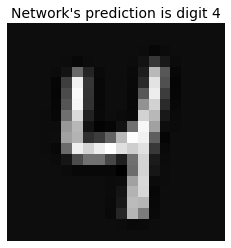

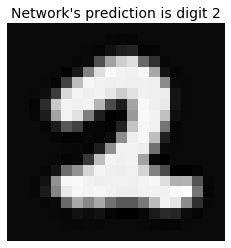

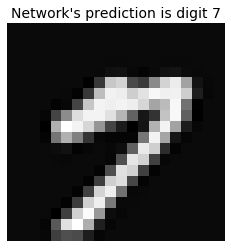

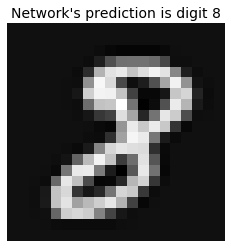

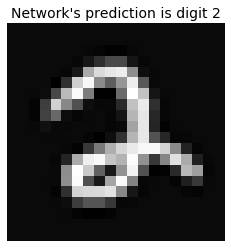

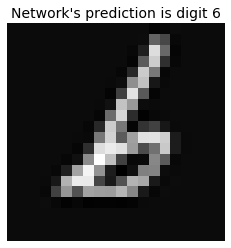

In [22]:
for i in range(6):
    rnd = np.random.randint(5000) # random test cases
    p = predict(Theta1,Theta2, X[rnd][:,np.newaxis].T) #predictions
    display(rnd,p)